## Scikit-Learn Workflow

In [3]:
#step1 - get the data ready
import pandas as pd
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
#create x- feature matrix (x contains all columns in heart_disease variable except Target col)
X = heart_disease.drop("target", axis=1)
#create y -label
Y = heart_disease["target"]


In [7]:
#Step2 - choose the right model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
# keeping the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [10]:
#step3 - Fit the model to the training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
#find the pattern in the training data
clf.fit(X_train, y_train)
#predict data
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [11]:
#step4 - Evaluate the Model on the training data and test data
clf.score(X_train, y_train) # the train data makes the model 100% accurate

1.0

In [12]:
clf.score(X_test, y_test)  # the test data makes the model 78% accurate

0.8524590163934426

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [14]:
confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [15]:
accuracy_score(y_test, y_preds)

0.8524590163934426

In [16]:
#step 5 - Improving a Model
#Trying different amount of n-estimators
import numpy as np
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying Model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print("")



Trying Model with 10 estimators...
Model accuracy on test set: 85.25%

Trying Model with 20 estimators...
Model accuracy on test set: 80.33%

Trying Model with 30 estimators...
Model accuracy on test set: 83.61%

Trying Model with 40 estimators...
Model accuracy on test set: 80.33%

Trying Model with 50 estimators...
Model accuracy on test set: 86.89%

Trying Model with 60 estimators...
Model accuracy on test set: 83.61%

Trying Model with 70 estimators...
Model accuracy on test set: 83.61%

Trying Model with 80 estimators...
Model accuracy on test set: 83.61%

Trying Model with 90 estimators...
Model accuracy on test set: 81.97%



In [17]:
#Step6 -- save a model and load it
import pickle
pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [18]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.819672131147541

## Getting data ready to be used with Machine Learning

In [2]:
#1. split the data into features and label(ie X and y)
#2. Filling - disregard missing values
#3. Feature encoding - converting non numerical values to numerical values
import pandas as pd
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#create x- feature matrix (x contains all columns in heart_disease variable except Target col)
X = heart_disease.drop("target", axis=1)
#create y -label
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [6]:
#Splitting the data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
43,53,0,0,130,264,0,0,143,0,0.4,1,0,2
206,59,1,0,110,239,0,0,142,1,1.2,1,1,3
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
231,57,1,0,165,289,1,0,124,0,1.0,1,3,3
128,52,0,2,136,196,0,0,169,0,0.1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2
38,65,0,2,155,269,0,1,148,0,0.8,2,0,2
142,42,0,2,120,209,0,1,173,0,0.0,1,0,2
277,57,1,1,124,261,0,1,141,0,0.3,2,0,3


## Using another data set to convert nonnumerical value to numerical

In [7]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [8]:
len(car_sales)

1000

In [10]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [11]:
#split into X and y
X = car_sales.drop("Price", axis = 1)
y = car_sales["Price"]

#Splitting the data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Building the machine learning model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train) # predict y label(Prices) using X features which are make, color, odometer, doors
model.score(X_test, y_test) #evaluate the model on the test data


ValueError: could not convert string to float: 'Honda'

In [14]:
#Turn the Categories into Numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([
    ("one_hot", one_hot, categorical_features)],
    remainder = "passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X 

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [15]:
X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


In [16]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [17]:
#Another way to convert/transform values to numerical
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [18]:
#Refitting the Model
#Splitting the data into training and test set
import numpy as np
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size = 0.2)
# Building the machine learning model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train) # predict y label(Prices) using X features which are make, color, odometer, doors
model.score(X_test, y_test) #evaluate the model on the test data

0.3235867221569877

## What if there are missing values in the dataset

In [2]:
import pandas as pd
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()


,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [3]:
#to know how many missing values is in the data
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [7]:
#split into X and y
X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

#convert non numerical to numerical for the machine to understand
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([
    ("one_hot", one_hot, categorical_features)],
    remainder = "passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X 

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [8]:
car_sales_missing["Doors"].value_counts() #an average car has 4 doors

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [10]:
#Option 1 - Filling missing data with pandas
car_sales_missing["Make"].fillna("missing", inplace=True)

car_sales_missing["Colour"].fillna("missing", inplace=True)


car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

car_sales_missing["Doors"].fillna(4, inplace=True)

In [11]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [12]:
#Option 2 - Remove rows with missing price value
car_sales_missing.dropna(inplace = True)

In [13]:
#split into X and y
X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

#convert non numerical to numerical for the machine to understand
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([
    ("one_hot", one_hot, categorical_features)],
    remainder = "passthrough")
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X 

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

## Filling missing values with Scikit-Learn

In [1]:
import pandas as pd
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [2]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [3]:
#Drop the rows with no label
car_sales_missing.dropna(subset = ["Price"], inplace= True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [4]:
#split into X and y
X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

In [7]:
#Fill missing values with scikitt-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#Fill categorical data with missing and numerical data with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value= 4)
num_imputer = SimpleImputer(strategy="mean")

#Define Columns 
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

#Create an imputer - something that fills missing data
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

#Transfrom the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [8]:
#Create a DataFrame of the filled data
car_sales_filled = pd.DataFrame(filled_X, columns = ["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [9]:
car_sales_filled.isna().sum() # to check if all missing values(nan) has been replaced

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [10]:
#convert non numerical to numerical for the machine to understand
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([
    ("one_hot", one_hot, categorical_features)],
    remainder = "passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X 

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [11]:
#Now that we have got our data as numbers and replaced the missing data; let's fit a model
# Building the machine learning model
import numpy as np
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
#Splitting the data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size = 0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train) # predict y label(Prices) using X features which are make, color, odometer, doors by finding a pattern
model.score(X_test, y_test) #evaluate the model on the test data

0.21990196728583944

## Choosing the right machine learning Model/Estimators/Algorithm for Regression Data Problem
#When prediction numbers, it's a Regression Problem, so you use Regression model
#Whenpredictiong a category by classifying(eg has heart disease or not), you use a Classifier Model
#If you are using Scikit-Learn; and not sure of what machine learning model to use, simply refer to sklearn machine learning map

In [1]:
#Using the California Housing Dataset for Regression Problem
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing;

In [2]:
#using the features(avg rooms, population, latitude, longitude etc) to predict the target(MedHouseValue)
#converting the dataset to a DataFrame
import pandas as pd
housing_df = pd.DataFrame(housing["data"], columns = housing["feature_names"])
housing_df 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [3]:
housing_df["MedHouseVal"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [4]:
housing_df["target"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,0.847


In [5]:
#Dropping a column
housing_df = housing_df.drop("MedHouseVal", axis=1)
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [6]:
#To predict the target value of houses(Median house price) using known inputs or labels
#import Algorithm/Estimator
from sklearn.linear_model import Ridge
import numpy as np
np.random.seed(42)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]
#split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#Instantiate and fit the model on training set
model = Ridge()
model.fit(X_train, y_train)
#Check the score of the model on the test set
model.score(X_test, y_test) 

0.5758549611440126

In [7]:
#Testing with another model
#import the RandomForestRegressorModel
import numpy as np
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]
#split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#Instantiate and fit the model on training set
model = RandomForestRegressor()
model.fit(X_train, y_train)
#Check the score of the model on the test set
model.score(X_test, y_test) 

0.8065734772187598

## Choosing the right machine learning Model/Estimators/Algorithm for Classification Data Problem
#If you have structured data, use ensemble methods for modelling;
#if you have unstructured data, use deep learning or transfer learning

In [9]:
import pandas as pd
import numpy as np
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

In [5]:
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
#split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#Instantiate and fit the model on training set
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
#Evaluate the model/Check the score of the model on the test set
clf.score(X_test, y_test) 

0.8524590163934426

## Fitting the model/algorithm on the data and using it to make predictions
* X = features, features variables, features data
* y = label, targets, target variable

In [4]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
#split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#Instantiate and fit the model on training set
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
#Evaluate the model/Check the score of the model on the test set
clf.score(X_test, y_test) 
#use a trained algorithm/model to make predictions
clf.predict(X_test) #1 means has heart disease while 0 means does not have heart disease

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [5]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [6]:
#Evaluation - Comparing the predictions to truth label to evaluate the model/algorithm
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)  #the prediction is 85 percent accurate to the truth label

0.8524590163934426

In [7]:
#Another method of comparing the predictions to truth label
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

In [22]:
#Making Predictions with predict_proba()
clf.predict_proba(X_test[:5])  #this returns probability of a classification label

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [7]:
#predicting on the same data above
clf.predict(X_test[:5])  #the higher value on the right is replaced with 1 from the array output above(predict_proba) while the 
#higher value on the left is replaced with 0

array([0, 1, 1, 0, 1], dtype=int64)

In [24]:
#Comparing the predictions to truth label to evaluate the Regression model/algorithm
import numpy as np
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]
#split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#Instantiate and fit the model on training set
model = RandomForestRegressor()
model.fit(X_train, y_train)
#Make predictions
y_preds = model.predict(X_test)
y_preds[:10]  #predictions


array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [10]:
np.array(y_test[:10]) #truth label

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [11]:
#Regression Prediction evaluation using mean absolute error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds) #this means the average difference between each truth value and predicted value is approximately 0.32

0.32659871732073664

In [12]:
housing_df["target"] #this means the next element in the array has a difference of approximately 0.32(ie the mean absolute error value in the above)

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

## Evaluating a machine learning Model/Estimators

In [15]:
#Evaluating a model using Scoring Parameter
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
#split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#Instantiate and fit the model on training set
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
#Evaluate the model/Check the score of the model on the test set
clf.score(X_test, y_test) 

0.8524590163934426

In [17]:
cross_val_score(clf,X,y,cv=5)

array([0.83606557, 0.8852459 , 0.7704918 , 0.8       , 0.8       ])

In [18]:
clf_cross_val_score = np.mean(cross_val_score(clf,X,y,cv=5)) # this returns the mean value of model estimation accuracy
clf_cross_val_score

0.8182513661202184

## Classification Model Evaluation Metrics:
* Accuracy
* Area under ROC Curve
* Confusion Matrix
* Classification Report


In [2]:
#Accuracy Metrics
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
#split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#Instantiate and fit the model on training set
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

#Evaluate the model/Check the score of the model on the test set
cross_val_score = cross_val_score(clf,X,y,cv=5)
np.mean(cross_val_score) # this shows that the model  is evaluated to predict the right label at the rate of 81% accuracy

0.811639344262295

In [3]:
#ROC Curve Metrics
#ROC is a comparison of a model truth positive rate(tpr) versus false positive rate(fpr)
#Truth positive rate(tpr) is when the model predicts 1 when the truth label is actually 1
#False positive rate(fpr) is when the model predicts 1 when the truth label is actually 0
#Truth negative rate(tnr) is when the model predicts 0 when the truth label is actually 0
#False negative rate(fnr) is when the model predicts 0 when the truth label is actually 1

from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
#split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#Instantiate and fit the model on training set
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
#Make predictions with probability
y_probs = clf.predict_proba(X_test)
y_probs[:10]



array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [11]:
y_probs_positive = y_probs[:,1] #retrieving column 1 from the array above
y_probs_positive[:10]


array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53])

In [7]:
#Calculating fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

#check the false positive rate
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

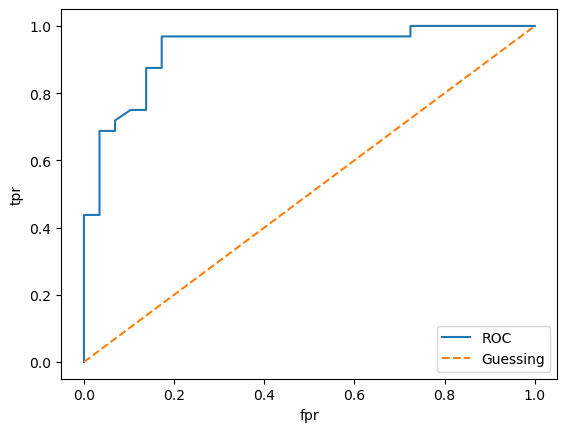

In [8]:
#Creating a functtion for plotting ROC Curve
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr):
    #plot roc_curve
    plt.plot(fpr,tpr, label="ROC")
    #plot baseline with no predictive power
    plt.plot([0,1],[0,1], linestyle="--", label="Guessing")
    plt.xlabel("fpr")
    plt.ylabel("tpr")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)
    

In [12]:
#to get area under curve(auc), ie to predict the accuracy of the roc_curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.9304956896551724

In [10]:
#Confusion Matrix Metrics
#Confusion Matrix is a comparison of the labels a model predicts to the actual label it was supposed to predict
#Confusion Matrix gives an idea of where the model is getting confused
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
#split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#Instantiate and fit the model on training set
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [30]:
#visualize confusion matrix with pd.crosstab
import pandas as pd
pd.crosstab(y_test, y_preds, rownames=["Actual Labels"], colnames=["Prediccted Labels"])

Prediccted Labels,0,1
Actual Labels,,
0,24,5
1,4,28


In [ ]:
#The above outcome shows that when the predicted label is 0 and the actual label is 0, the number of times of this occurence in y_test sample is 24
len(y_test)
#the sum of the outcome samples(24,5,4,8) is 61

<AxesSubplot:>

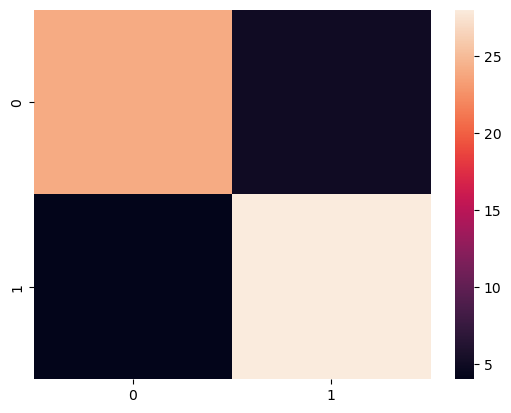

In [9]:
#Making Confusion Matrix more visual with seaborn_heatmap
import  seaborn as sns
conf_matrix = confusion_matrix(y_test, y_preds)
sns.heatmap(conf_matrix)


In [13]:
#To evaluate the model(ie to know the accuracy of the model with confusion matrix metric)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds) 

0.8524590163934426

In [15]:
#To evaluate the precision of the model with confusion matrix metric(ie of the positive predicted, what percentage is truly positive)
from sklearn.metrics import precision_score
precision_score(y_test, y_preds)

0.8484848484848485

In [21]:
#Classification Report Metrics
#To evaluate the model with classification report metrics
from sklearn.metrics import classification_report
import numpy as np
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
#split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#Instantiate and fit the model on training set
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)
print(classification_report(y_test, y_preds))


              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [22]:
#Assuming there are 10000 people and only one has a heart disease, the model below predicts who has the heart disease
#Where Precision and Recall become valuable
import numpy as np
disease_true = np.zeros(10000) #all 10000 has target value of 0 ie no heart disease
disease_true[0] = 1 # one out of the 10000 has target value of 1 ie has heart disease
disease_preds =  np.zeros(10000) #model predicts every case as 0
pd.DataFrame(classification_report(disease_true, disease_preds,output_dict= True))


C:\Users\musiliuao\Desktop\sample_project1\env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\musiliuao\Desktop\sample_project1\env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\musiliuao\Desktop\sample_project1\env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


## Regression Model Evaluation Metrics:
* R Squared or Coefficient of Determination
* Mean Absolute Error
* Mean Squared Error

In [8]:
#To evaluate the model with Coefficient of Determination Metrics
import numpy as np
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]
#split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#Instantiate and fit the model on training set
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test) #this means 80 percent of the truth or actual label will be predicted correctly using this algorithm


0.8065734772187598

In [9]:
#To evaluate the model with R Squared Metrics
from sklearn.metrics import r2_score
#fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean[:10]


array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [11]:
r2_score(y_true= y_test, y_pred=y_test_mean) #an r2_score of 0 value means the model is not predicting the truth/target label correctly

0.0

In [12]:
r2_score(y_true= y_test, y_pred=y_test) #an r2_score of 1 value means the model is predicting the truth/target label correctly

1.0

In [13]:
#To evaluate the model with Mean Absolute Error(MAE) Metrics
#MAE is the mean of the absolute difference between the actual value and the predicted value
import numpy as np
from sklearn.metrics import mean_absolute_error
y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds) #this means that each y_pred value is plus or minus 0.32(mae) to the y_test value 
mae

0.32659871732073664

In [16]:
df = pd.DataFrame(data={"actual values": y_test, "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head()

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240


In [17]:
np.abs(df["differences"]).mean()

0.32659871732073803

In [18]:
#To evaluate the model with Mean Squared Error(MSE) Metrics
#MSE is the mean of the square of the error between the actual value and the predicted value
import numpy as np
from sklearn.metrics import mean_squared_error
y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds) #this means that each y_pred value is plus or minus 0.32(mae) to the y_test value 
mse


0.2534678520824551

In [19]:
df["squared_differences"] = np.square(df["differences"]) #squared_differences shows the error value that are quite large or low
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [21]:
df["squared_differences"].mean() 

0.25346785208245565

## Evaluating a Machine Learning Model/Algorithm/Estimator using the Scoring Parameter API

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
import numpy as np

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
#split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#Instantiate and fit the model on training set
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
#cross val accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy") #the "scoring" parameter can take values of precision or recall according to the metrics being evaluated
cv_acc

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [17]:
np.mean(cv_acc) #this means the model predicts the target label at a cross validated accuracy of 81.16 percent

0.811639344262295

## Evaluating a Model with scikit-learn functions metrics
* Classifcation Model Evaluation Metrics include(accuracy_score, f1-score, precision, recall_score)

* Regression Model Evaluation Metrics include(r2_score, mean_absolute_error, mean_square_error)

In [4]:
import pandas as pd
import numpy as np
heart_disease = pd.read_csv("heart-disease.csv")
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score
import numpy as np
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
#create X and y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
#split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#Create the Model
clf = RandomForestClassifier(n_estimators=100)
#Fit the model on training set
clf.fit(X_train, y_train)
#Evaluate the model using accuracy_score metrics
y_preds = clf.predict(X_test)
print(f"accuracy score:{accuracy_score(y_test, y_preds)*100:.2f}%") #the ability of the model to predict the truth or actual label accurately
print(f"precision score:{precision_score(y_test, y_preds)}") #the ability of the model not to label as positive, a sample that is negative. The best value for the model is 1 while the worst value is 0.
print(f"recall score:{recall_score(y_test, y_preds)}") #the ability of the model to find all the positive sample. the closer to 1 the value, the better the model
print(f"f1 score:{f1_score(y_test, y_preds)}")  #the mean of precision and recall. the closer to 1 the value, the better the model


accuracy score:85.25%
precision score:0.8484848484848485
recall score:0.875
f1 score:0.8615384615384615


## Improving a Machine Learning Model
How to Adjust HyperParameters:

Hyperparameters are settings on a model that you can adjust to improve its ability to find patterns:
* By Hand
* By RandomizedSearchCV/ RandomizedSearchCrossValidation function
* By GridSearchCV function 

In [2]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.get_params() #baseline parameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [10]:
#Tuning HyperParameters by Hand can be done splitting the data into training, validation and test sets
def evaluate_preds(y_true, y_preds):
    """
    Performs model evaluation comparison on y_true label and y_pred label on a
    classification algorithm
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall":round(recall, 2),
                   "f1": round(f1, 2)
                
                  }
    print(f"accuracy score:{accuracy*100:.2f}%") #the ability of the model to predict the truth or actual label accurately
    print(f"precision score:{precision:.2f}") #the ability of the model not to label as positive, a sample that is negative. The best value for the model is 1 while the worst value is 0.
    print(f"recall score:{recall:.2f}") #the ability of the model to find all the positive sample. the closer to 1 the value, the better the model
    print(f"f1 score:{f1:.2f}")  #the mean of precision and recall. the closer to 1 the value, the better the model
    
    return metric_dict


In [7]:
from sklearn.ensemble import RandomForestClassifier
#shuffle the data
heart_disease_shuffled = heart_disease.sample(frac = 1) # frac=1 means shuffle 100% of the data
#Split into X and y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]
# Split into train & test
np.random.seed(42) # seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#Split the data into train, validation and test sets
#train_split = round(0.7 * len(heart_disease_shuffled))
#valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))
#X_train, y_train =X[:train_split], y[:train_split]
#X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
#X_test, y_test = X[valid_split:], y[valid_split:]
clf = RandomForestClassifier(n_estimators=100, max_depth=10) #hyperparameters tuning: changing n_estimators value, max_depth values etc
clf.fit(X_train, y_train)
#Baseline Predictions
#y_preds = clf.predict(X_valid)
y_preds = clf.predict(X_test)
#Evaluate the model on validation data set
#baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics = evaluate_preds(y_test, y_preds)
baseline_metrics

Acc: 80.33%
Precision: 0.79
Recall: 0.84
F1 score: 0.81


{'accuracy': 0.8, 'precision': 0.79, 'recall': 0.84, 'f1': 0.81}

In [18]:
#Tuning HyperParameters by RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import RandomizedSearchCV
grid = {"n_estimators": [10,100,200,500,1000,1200],
       "max_depth":[None,5,10,20,30],
       "max_features": ["auto", "sqrt"],
       "min_samples_split":[2,4,6],
       "min_samples_leaf":[1,2,4]}
np.random.seed(42)
#create X and y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
#split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#Create the Model
clf = RandomForestClassifier(n_jobs=1) #n_jobs = 1 means only one computer processor is dedicated to the machine learning model
#Set up the RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator = clf, param_distributions = grid, n_iter=10,#n-iters means number of models to try
                           cv=5, verbose=2
                           )
#Fit the model with RandomizedSearchCV
rs_clf.fit(X_train, y_train)



Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   4.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   4.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   4.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   4.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [19]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10}

In [9]:
# Making Predictions with the best HyperParameters
rs_y_preds = rs_clf.predict(X_test)
# Evaluate the Predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 90.16%
Precision: 0.88
Recall: 0.94
F1 score: 0.91


In [10]:
#Tuning HyperParameters by GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV, train_test_split
grid_2 = {"n_estimators": [100,200,500],
       "max_depth":[None],
       "max_features": ["auto", "sqrt"],
       "min_samples_split":[6],
       "min_samples_leaf":[1,2]}
np.random.seed(42)
#create X and y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
#split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#Create the Model
clf = RandomForestClassifier(n_jobs=1) #n_jobs = 1 means only one computer processor is dedicated to the machine learning model
#Set up the GridSearchCV
grid_clf = GridSearchCV(estimator = clf, param_grid = grid_2,
                           cv=5, verbose=2
                           )
#Fit the model with RandomizedSearchCV
grid_clf.fit(X_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [11]:
grid_clf.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 100}

In [12]:
# Making Predictions with the best HyperParameters
grid_y_preds = rs_clf.predict(X_test)
grid_y_preds

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [13]:
# Evaluate the Predictions
grid_metrics = evaluate_preds(y_test, grid_y_preds)

Acc: 85.25%
Precision: 0.85
Recall: 0.88
F1 score: 0.86


## Comparing the different Models Metrics after HyperParameters Tuning :

## Comparing the metrics of different Scikit-Learn models

One of the most important things when comparing different models is to make sure they're compared on the same data splits.

For example, let's say you have `model_1` and `model_2` which each differ slightly.

If you want to compare and evaluate their results, `model_1` and `model_2` should both be trained on the same data (e.g. `X_train` and `y_train`) and their predictions should each be made on the same data, for example:
* `model_1.fit(X_train, y_train)` -> `model_1.predict(X_test)` -> `model_1_preds`
* `model_2.fit(X_train, y_train)` -> `model_2.predict(X_test)` -> `model_2_preds`

Note the differences here being the two models and the 2 different sets of predictions which can be compared against each other.

This short notebook compares 3 different models on a small dataset.
1. A baseline `RandomForestClassifier` (all default parameters)
2. A `RandomForestClassifier` tuned with `RandomizedSearchCV` (and `refit=True`)
3. A `RandomForestClassifier` tuned with `GridSearchCV` (and `refit=True`)

The most important part is they all use the same data splits created using `train_test_split()` and `np.random.seed(42)`.

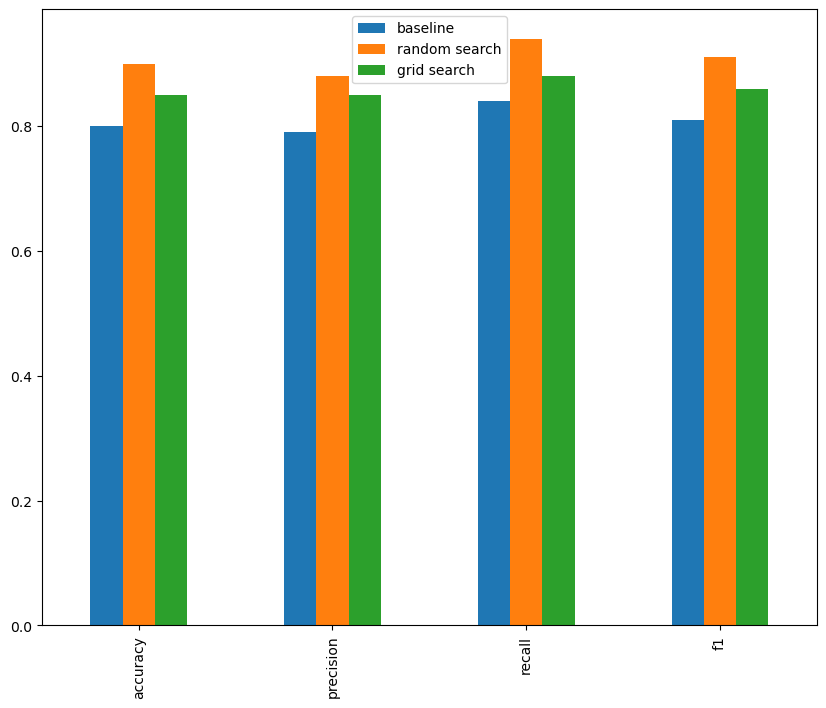

In [15]:
import pandas as pd
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "random search": rs_metrics,
                                "grid search": grid_metrics})

compare_metrics.plot.bar(figsize=(10, 8)); #from the graph below, the model with randomizedsearchcv metrics has the best accuracy score

## Saving and Loading Trained Machine Learning Model

In [16]:
#saving an existing model to a file
import pickle
pickle.dump(grid_clf, open("grid_search_cv.pk1", "wb"))


In [17]:
#Loading a saved model
loaded_pickle_model = pickle.load(open("grid_search_cv.pk1", "rb"))

In [18]:
#Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 85.25%
Precision: 0.87
Recall: 0.84
F1 score: 0.86


{'accuracy': 0.85, 'precision': 0.87, 'recall': 0.84, 'f1': 0.86}